<a href="https://colab.research.google.com/github/Mobad225/Basic-PCA/blob/master/sheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1)**


1.   Number of dimensions = 4
2.   Data types of Attributes : Numeric (Integer)
3.   Distance = (20$^2$ + (-10$^2$) + 20$^2$ + (-50$^2$))$^\frac{1}{2}$ = 10 * 34$^\frac{1}{2}$ = 58.31
4.   Length | $X_{2}$ | = (20$^2$ + 50$^2$ + 40$^2$ + 70$^2$)$^\frac{1}{2}$ = 10 * 94$^\frac{1}{2}$ = 96.95
5.   Length | $X_{2}$ | = 96.95,
And Length | $X_{4}$ | = 83.07,
And since $X_{2}$ . 
$X_{4}$ = 7900 , Then Cos(ang) = $\frac{7900}{96.95 * 83.07}$ = 0.98093
6.   We need attribute scaling as some attributes have a greater mean, and they will be dominant. We need to normalize the data.
7.   \begin{pmatrix}
     0 & 1 & 0 & 1 \\
     \frac{1}{2} & 0 & 1 & \frac{3}{4} \\
     1  & 0  & \frac{2}{3} & \frac{3}{8}  \\
     \frac{1}{2} & 0 & \frac{1}{3} & \frac{5}{8} \\
     0 & 1 & \frac{2}{3} & 0
     \end{pmatrix}
8.   Distance = (1$^2$ + (-1$^2$) + ($\frac{2}{3}$)$^2$ + ($\frac{-5}{8}$)$^2$)$^\frac{1}{2}$ = 1.6838
9.  Length | $X_{2}$ | = (0.5$^2$ + 0$^2$ + 1$^2$ + 0.75$^2$)$^\frac{1}{2}$ = 1.3463
10.  Length | $X_{2}$ | = 1.3463,
And Length | $X_{4}$ | = 0.867,
And since $X_{2}$ . 
$X_{4}$ = 1.052 , Then Cos(ang) = $\frac{1.052}{1.3463 * 0.867}$ = 0.9013











In [0]:
import numpy as np
dataset  = np.matrix('10 60 10 90; 20 50 40 70; 30 50 30 40; 20 50 20 60; 10 60 30 10')

## Computing norm of each instance

In [27]:
print(np.linalg.norm(dataset, axis = 1))

[109.08712115  96.95359715  76.81145748  83.06623863  68.556546  ]


## `Computing the cosine similarity matrix`

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(dataset))

[[1.         0.93604728 0.85927665 0.97114627 0.65519967]
 [0.93604728 1.         0.95338522 0.98093136 0.76728608]
 [0.85927665 0.95338522 1.         0.95604709 0.8735402 ]
 [0.97114627 0.98093136 0.95604709 1.         0.77264358]
 [0.65519967 0.76728608 0.8735402  0.77264358 1.        ]]


## Computing the euclidean distance matrix

In [30]:
from sklearn.metrics.pairwise import euclidean_distances
print(euclidean_distances(dataset))

[[ 0.         38.72983346 58.30951895 34.64101615 82.46211251]
 [38.72983346  0.         33.1662479  22.36067977 62.44997998]
 [58.30951895 33.1662479   0.         24.49489743 37.41657387]
 [34.64101615 22.36067977 24.49489743  0.         52.91502622]
 [82.46211251 62.44997998 37.41657387 52.91502622  0.        ]]


# PRINCIPAL COMPONENT ANALYSIS

## Print new Dataset

In [87]:
import pandas as pd
dataframe = pd.DataFrame(dataset, columns = ['a1', 'a2', 'a3', 'a4'])
del dataframe['a3']
print(dataframe)

   a1  a2  a4
0  10  60  90
1  20  50  70
2  30  50  40
3  20  50  60
4  10  60  10


## Plot the data using 3d scatter plots

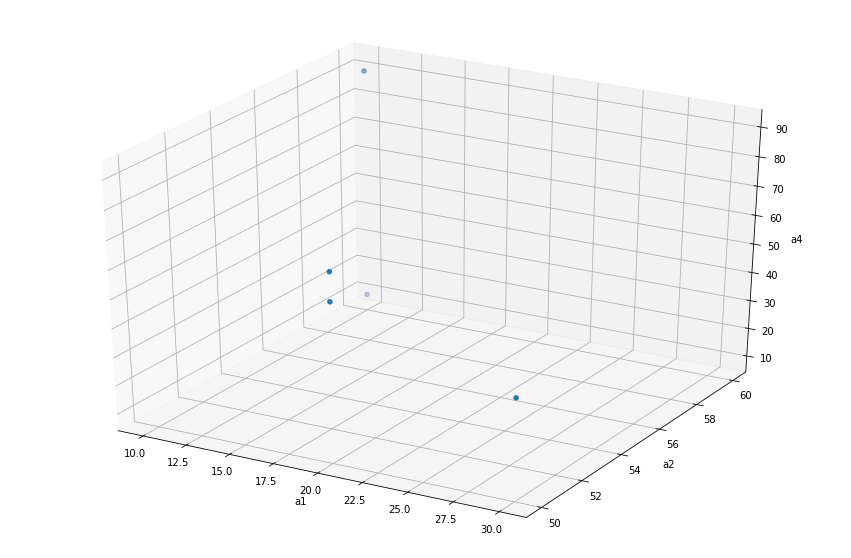

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,10))
ax = plt.gca(projection='3d')
ax.scatter3D(dataframe.T.iloc[0], dataframe.T.iloc[1], dataframe.T.iloc[2])
ax.set_xlabel(dataframe.columns.values[0], fontsize = 10)
ax.set_ylabel(dataframe.columns.values[1], fontsize = 10)
ax.set_zlabel(dataframe.columns.values[2], fontsize = 10)
plt.show()
plt.close()

## Compute mean vector

In [101]:
mean_vector = dataframe.mean().values
print(mean_vector)

[18. 54. 54.]


## Compute centered data matrix Z

In [110]:
ds = np.matrix(dataframe)
for i in range(len(ds)):
  ds[i] = ds[i] - mean_vector.T
df = pd.DataFrame(ds)
print(ds)

[[ -8   6  36]
 [  2  -4  16]
 [ 12  -4 -14]
 [  2  -4   6]
 [ -8   6 -44]]


## Compute Covariance matrix

In [113]:
cov = df.cov()
print(cov)

      0     1      2
0  70.0 -40.0  -15.0
1 -40.0  30.0  -20.0
2 -15.0 -20.0  930.0


## Get Eigenvectors and eigenvalues

In [138]:
e_val , e_vect = np.linalg.eigh(cov)
e_vect = e_vect.T
print('Eigen values'.center(45), e_val, 'Eigen vectors'.center(45), e_vect , sep = '\n\n')

                 Eigen values                

[  4.60865707  94.71537456 930.67596837]

                Eigen vectors                

[[ 0.52611085  0.8499905   0.02689832]
 [ 0.85025739 -0.5263604   0.00266574]
 [-0.01642407 -0.02146802  0.99963462]]


## Verify $U^T$ΛU= COV.


In [142]:
print(e_vect.T.dot(np.diag(e_val).dot(e_vect)))

[[ 70. -40. -15.]
 [-40.  30. -20.]
 [-15. -20. 930.]]


## Compute variance by the best eigenvector

In [151]:
e_vect = e_vect.T
ls = []
tot = 0
for i in range(len(e_vect)):
  ls.append((e_val[i], e_vect[i]))
  tot += e_val[i]
ls.sort(reverse = True)
print("%.2f%%" % (ls[0][0]*100/tot))

90.36%


### Comment : 90.36% of the variance is good.

## Projection Matrix

In [160]:
p_mat = []
for i in range(2):
  p_mat.append(ls[i][1])
p_mat = np.array(p_mat).T
print(p_mat)

[[ 0.02689832  0.8499905 ]
 [ 0.00266574 -0.5263604 ]
 [ 0.99963462 -0.02146802]]


## Projection to 2D

In [170]:
reduced = ds.dot(p_mat)
print(reduced)

[[ 35.78765422 -10.73093514]
 [ 16.0372876    3.46193428]
 [-13.68276781  12.60587991]
 [  6.0409414    3.67661448]
 [-44.18311541  -9.01349353]]


## Scatter the 2D Data

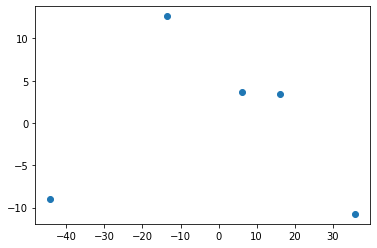

In [176]:
reduced = pd.DataFrame(reduced)
plt.scatter(reduced.iloc[:,:1], reduced.iloc[:,1:])
plt.show()
plt.close()

# Question 4)

## Mean & Covariance

In [192]:
dataset = np.matrix('6 -4; -3 5; -2 6; 7 -3')
mean = dataset.mean(axis = 0).T
df = pd.DataFrame(dataset)
cov = df.cov()
print("Mean = ", mean, sep = '\n')
print("\nCov = ", cov, sep = '\n')

Mean = 
[[2.]
 [1.]]

Cov = 
           0          1
0  27.333333 -26.666667
1 -26.666667  27.333333


## Eigenvalue 162 >> 2, So taken eigenvector is \begin{pmatrix}
     \frac{-1}{sqrt(2)}  \\
     \frac{1}{sqrt(2)} \\
     \end{pmatrix}

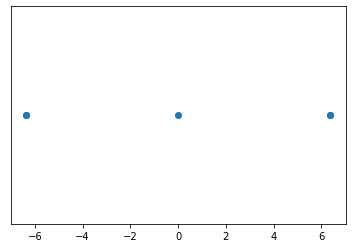

In [235]:
e_vect = np.matrix('-0.70710678; 0.70710678')
mat = np.zeros(shape = (5,2))
for i in range(len(dataset)):
  mat[i] = (dataset[i] - mean.T)
pts = np.array(mat.dot(e_vect).T)
plt.scatter(pts, np.zeros_like(pts))
plt.yticks([])
plt.show()
plt.close()